rbf
Accuracy score of the training data :  76.38436482084691
Accuracy score of the test data :  78.57142857142857


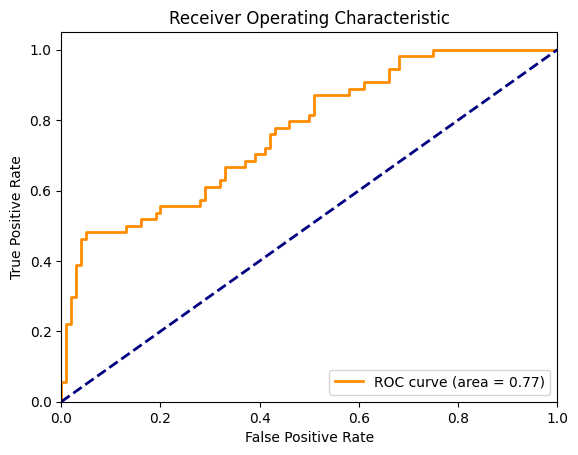

<Figure size 640x480 with 0 Axes>

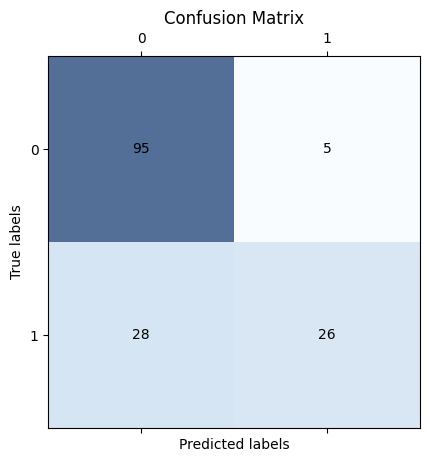

F1 Score: 0.61
Recall: 0.48
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       100
           1       0.84      0.48      0.61        54

    accuracy                           0.79       154
   macro avg       0.81      0.72      0.73       154
weighted avg       0.80      0.79      0.77       154

sigmoid
Accuracy score of the training data :  49.5114006514658
Accuracy score of the test data :  52.5974025974026


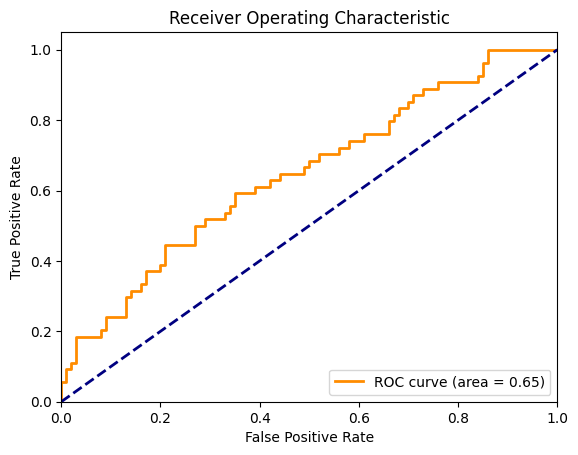

<Figure size 640x480 with 0 Axes>

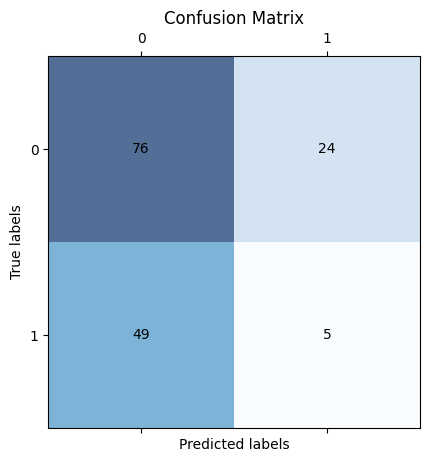

F1 Score: 0.12
Recall: 0.09
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68       100
           1       0.17      0.09      0.12        54

    accuracy                           0.53       154
   macro avg       0.39      0.43      0.40       154
weighted avg       0.46      0.53      0.48       154

linear
Accuracy score of the training data :  78.33876221498372
Accuracy score of the test data :  77.27272727272727


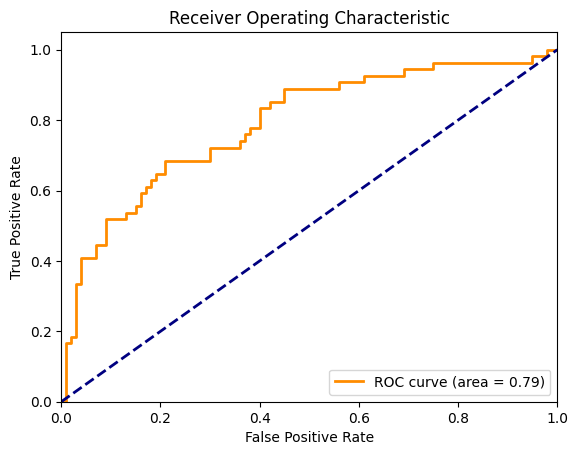

<Figure size 640x480 with 0 Axes>

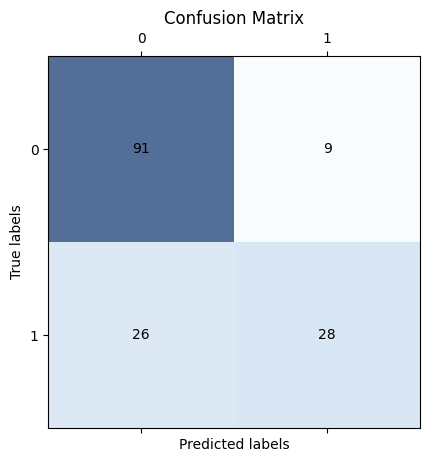

F1 Score: 0.62
Recall: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

poly
Accuracy score of the training data :  77.52442996742671
Accuracy score of the test data :  75.97402597402598


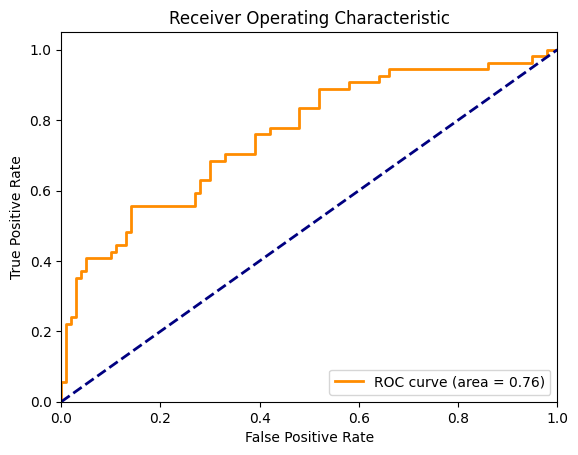

<Figure size 640x480 with 0 Axes>

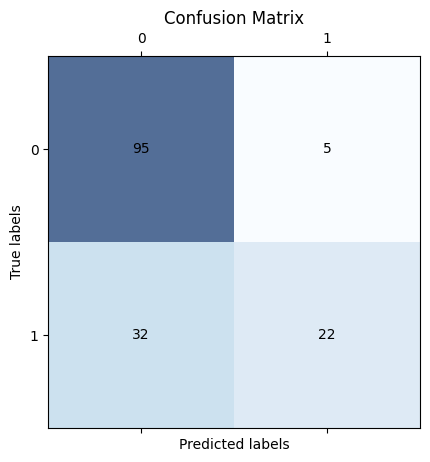

F1 Score: 0.54
Recall: 0.41
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       100
           1       0.81      0.41      0.54        54

    accuracy                           0.76       154
   macro avg       0.78      0.68      0.69       154
weighted avg       0.77      0.76      0.73       154



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score, recall_score, classification_report

# Load the dataset
file_path = 'diabetes.csv'
diabetes_dataset = pd.read_csv(file_path) 

# Separate features and target variable
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
kernels = ["rbf", "sigmoid", "linear", "poly"]
# Step 7: Train the SVM model
for kernel_c in kernels:
    # Initialize and train the SVM classifier
    classifier = svm.SVC(kernel=kernel_c, probability=True)
    classifier.fit(X_train, Y_train)

    # Make predictions on the training and testing sets
    X_train_prediction = classifier.predict(X_train)
    X_test_prediction = classifier.predict(X_test)

    # Compute accuracy scores
    print(kernel_c)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
    print('Accuracy score of the training data : ', training_data_accuracy * 100)
    print('Accuracy score of the test data : ', test_data_accuracy * 100)

    # Compute predicted probabilities for ROC curve
    y_score = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(Y_test, X_test_prediction)

    # Plot confusion matrix
    plt.figure()
    plt.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute F1-score and recall
    f1 = f1_score(Y_test, X_test_prediction)
    recall = recall_score(Y_test, X_test_prediction)

    print(f"F1 Score: {f1:.2f}")
    print(f"Recall: {recall:.2f}")

    # Detailed classification report
    print("Classification Report:")
    print(classification_report(Y_test, X_test_prediction))
